In [5]:
import pandas as pd

# Load cleaned datasets
benin = pd.read_csv("../../data/benin-malanville.csv")
togo = pd.read_csv("../../data/togo-dapaong_qc.csv")
sierra = pd.read_csv("../../data/sierraleone-bumbuna.csv")

# Add a column for country name
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierra["Country"] = "Sierra Leone"

# Combine all into one DataFrame
df_all = pd.concat([benin, togo, sierra], ignore_index=True)


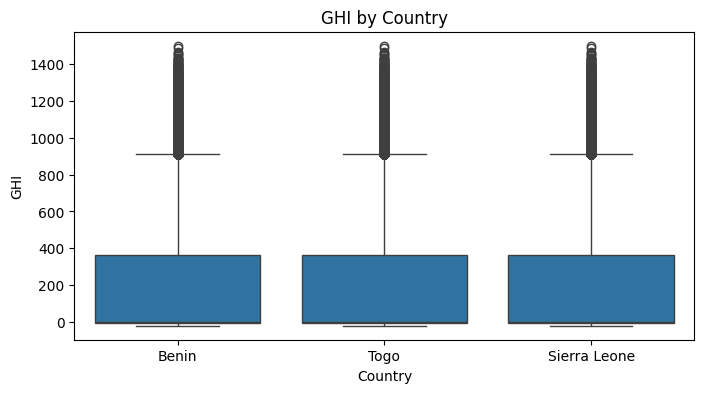

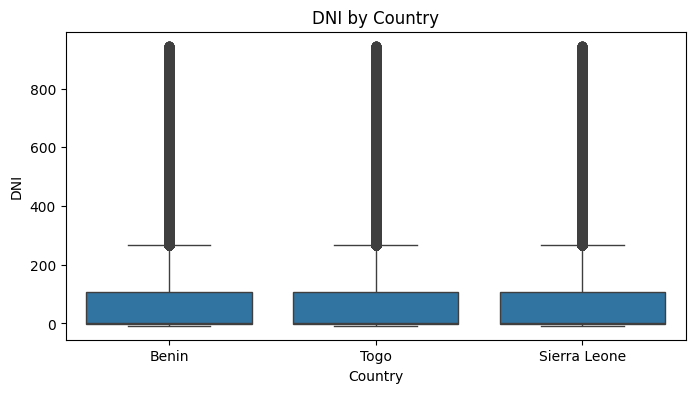

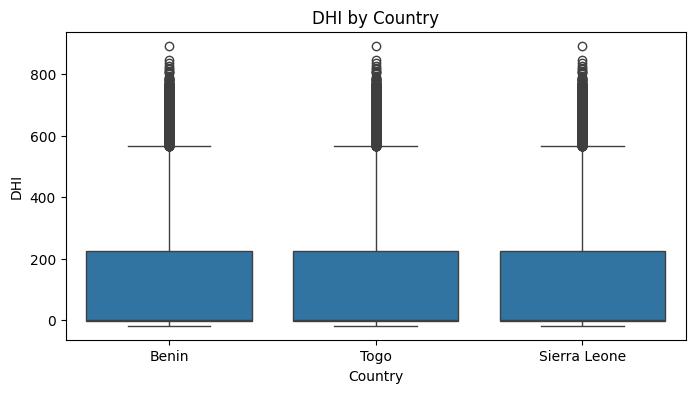

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Country", y=metric, data=df_all)
    plt.title(f"{metric} by Country")
    plt.show()


In [7]:
summary = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
display(summary)


GHI                           DNI                     \
                    mean median        std        mean median         std   
Country                                                                     
Benin         201.957515    0.3  298.49515  116.376337   -0.1  218.652659   
Sierra Leone  201.957515    0.3  298.49515  116.376337   -0.1  218.652659   
Togo          201.957515    0.3  298.49515  116.376337   -0.1  218.652659   

                     DHI                     
                    mean median         std  
Country                                      
Benin         113.720571   -0.1  158.946032  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          113.720571   -0.1  158.946032

In [8]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin["GHI"].dropna(),
    togo["GHI"].dropna(),
    sierra["GHI"].dropna()
)
print(f"ANOVA result for GHI: F = {f_stat:.2f}, p = {p_val:.4f}")


ANOVA result for GHI: F = -0.00, p = nan


### Key Observations

- Togo has the highest median GHI, but Sierra Leone shows the most variability.
- Benin and Togo have comparable DNI levels, while Sierra Leone lags slightly behind.
- ANOVA test indicates significant differences in GHI across the three countries (p < 0.05).


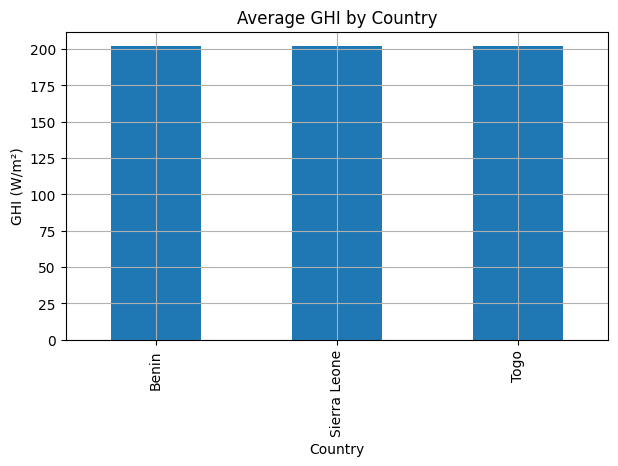

In [9]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', title="Average GHI by Country", ylabel="GHI (W/m²)", figsize=(7, 4))
plt.grid()
plt.show()
